In [1]:
#apı key :uZ4A6gYCyYMjLfNGmJottjO0H

In [2]:
#api secret key : EE980C4yDBYrpHmw2PNeylxJkXXkMMPVznKjmV7aYbnLIRmHFX

In [3]:
#bearer token : AAAAAAAAAAAAAAAAAAAAANUkRAEAAAAAEOr3kAtP2%2F36ljrHd6rSV88W4wc%3D9ORwZYxM3V17sWptV8omIfFcXXUdJHoB8f9T2j9bJZ5ecmUkAx

In [4]:
#access token : 1137017111317024768-bTaklNTeaTatMnW41kyMHt0f515bzX

In [5]:
#access token secret : JgskvnYc2ZwovuPwRaiixBmuwzWPmsUp81THKf0m8Fkgj

In [6]:
from warnings import filterwarnings
filterwarnings('ignore')

In [7]:
!pip install tweepy

In [8]:
import tweepy, codecs


consumer_key = 'uZ4A6gYCyYMjLfNGmJottjO0H'
consumer_secret = 'EE980C4yDBYrpHmw2PNeylxJkXXkMMPVznKjmV7aYbnLIRmHFX'
access_token = '1137017111317024768-bTaklNTeaTatMnW41kyMHt0f515bzX'
access_token_secret = 'JgskvnYc2ZwovuPwRaiixBmuwzWPmsUp81THKf0m8Fkgj'


auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

Bu noktada twitter ile bağlantı gerçekleştirdik.

In [10]:
mes = api.me()

In [11]:
mes.screen_name

'h0nbad'

In [12]:
#kullanıcı temel bilgileri

In [13]:
user = api.get_user(id = "h0nbad")

In [14]:
user.screen_name

'h0nbad'

In [15]:
user.followers_count

86

In [17]:
name = "h0nbad"
tweet_count = 10

user_timetime = api.user_timeline(id = name, count = tweet_count)

for i in user_timetime:
    print(i.text)

@FGemci Hmm ✍️
Böyle ülke yönetimine, böyle topluma, böyle liyakatsiz planlamaya böyle milli takım :)
@fthdulgar @hbylm Ajajajajsjdk
@kahkecibeyza hakkımı yiyosun, ankara havası açınca halimi biliyosun..
Beni sorgulamaya ve okumaya iten tüm etmenlere hayatımı borçluyum. Eğer sorgulamasaydım, bu toplum gibi düşünecek v… https://t.co/GgL5JYQt8g
Bu toplum içerisinde yaşadığım her geçen gün, gördüğüm ve yaşadığım olaylar ile bu olaylara verilen tepkiler bana g… https://t.co/xQpJ7bNIkH
@hbylm @CeyhunKnlz Kıyamet mi kopuyo
“tuzağa düştün ahraz”
@hbylm Duydun ya rab
@hbylm Fener kaç yıl şampiyon olamaz?


In [18]:
#retweet edilen tweetler

In [19]:
retweets = api.retweets_of_me(count = 20)
for retweet in retweets:
    print(retweet.text)

Ulan felek, kahpe misin değil misin bilmem ama, benden yana değilsin..
@duhanarslan3 Kalmadı hocam gasp edildi, Atatürkçü ve aydın bir lideri yediler öylece
@fthdulgar https://t.co/DDHmPZY5wy
Sadece cs de değil.. https://t.co/PbdWUOx2pY
@Enumoar https://t.co/YibwO8ORUL


# Hashtag'ler

Gün içerisindeki hastagler ile güncellenmiştir.

In [20]:
results = api.search(q = "#izmir", 
                     lang = "tr", 
                     result_type = "recent", 
                     count = 100)

In [21]:
def tweets_df(results):
    id_list = [tweet.id for tweet  in results]
    import pandas as pd
    data_set = pd.DataFrame(id_list, columns = ["id"])
    
    data_set["text"] = [tweet.text for tweet in results]
    data_set["created_at"] = [tweet.created_at for tweet in results]
    data_set["retweet_count"] = [tweet.retweet_count for tweet in results]
    data_set["user_screen_name"] = [tweet.author.screen_name for tweet in results]
    data_set["user_followers_count"] = [tweet.author.followers_count for tweet in results]
    data_set["user_location"] = [tweet.author.location for tweet in results]
    data_set["Hashtags"] = [tweet.entities.get('hashtags') for tweet in results]
    
    return data_set

In [22]:
data = tweets_df(results)

In [23]:
data

,id,text,created_at,retweet_count,user_screen_name,user_followers_count,user_location,Hashtags
0,1440983956791382019,Karsiyakadayim \n\nKendi evimde 🙈\n\n💯 OrjinaL...,2021-09-23 10:18:42,0,melisa050535,3,,[]
1,1440983954274803712,olan birini #buca üzebilmek #alsancak için #b...,2021-09-23 10:18:41,0,AksutOznil,139,,"[{'text': 'buca', 'indices': [12, 17]}, {'text..."
2,1440983884867457028,RT @omeralpyasasin: Bu tweet'i gören herkes 10...,2021-09-23 10:18:24,69,SeviN_Rt,349,,"[{'text': 'izmir', 'indices': [131, 137]}]"
3,1440983845533360131,RT @Berran92474880: sarılarak dışarı iple bekl...,2021-09-23 10:18:15,57,AskinYuzgec,29,,"[{'text': 'izmir', 'indices': [58, 64]}]"
4,1440983844715470851,RT @Berran92474880: sarılarak dışarı iple bekl...,2021-09-23 10:18:15,57,Alva90133569,28,,"[{'text': 'izmir', 'indices': [58, 64]}]"
...,...,...,...,...,...,...,...,...
57,1440983562484912132,"RT @Beylem10130533: itibaren, Bir ne kadar #iz...",2021-09-23 10:17:08,57,Dalia44017323,28,,"[{'text': 'izmir', 'indices': [43, 49]}]"
58,1440983561574682626,"RT @Beylem10130533: itibaren, Bir ne kadar #iz...",2021-09-23 10:17:07,57,Siu26033580,28,,"[{'text': 'izmir', 'indices': [43, 49]}]"
59,1440983560723308545,"RT @Beylem10130533: itibaren, Bir ne kadar #iz...",2021-09-23 10:17:07,57,Vi32849724,28,,"[{'text': 'izmir', 'indices': [43, 49]}]"
60,1440983559796363267,"RT @Beylem10130533: itibaren, Bir ne kadar #iz...",2021-09-23 10:17:07,57,Tam50513562,28,,"[{'text': 'izmir', 'indices': [43, 49]}]"


In [24]:
data.to_csv("data_twitter.csv")

# Profil Analizi

In [25]:
#temel bilgiler

In [26]:
mes = api.get_user("h0nbad")

In [27]:
mes.verified

False

In [28]:
mes.screen_name

'h0nbad'

In [29]:
mes.statuses_count

418

In [30]:
mes.followers_count

86

In [31]:
mes.favourites_count

8853

In [32]:
mes.friends_count

197

In [47]:
tweets = api.user_timeline(id = "h0nbad")

In [48]:
for i in tweets:
    print(i.text)

@FGemci Hmm ✍️
Böyle ülke yönetimine, böyle topluma, böyle liyakatsiz planlamaya böyle milli takım :)
@fthdulgar @hbylm Ajajajajsjdk
@kahkecibeyza hakkımı yiyosun, ankara havası açınca halimi biliyosun..
Beni sorgulamaya ve okumaya iten tüm etmenlere hayatımı borçluyum. Eğer sorgulamasaydım, bu toplum gibi düşünecek v… https://t.co/GgL5JYQt8g
Bu toplum içerisinde yaşadığım her geçen gün, gördüğüm ve yaşadığım olaylar ile bu olaylara verilen tepkiler bana g… https://t.co/xQpJ7bNIkH
@hbylm @CeyhunKnlz Kıyamet mi kopuyo
“tuzağa düştün ahraz”
@hbylm Duydun ya rab
@hbylm Fener kaç yıl şampiyon olamaz?
sa from honbadapp
@serkannkargii Kesinlikle
@serkannkargii Hayatta kalma içgüdüsünden dolayı da diyebilir miyiz sayın hocam
Bu zamana kadar iş başvurusunda bulunduğum 30+ şirketten sadece yurt dışındaki bir firma geri dönüş yaptı. Olumsuz… https://t.co/H2KbbvvTdN
@kahkecibeyza @hbylm Cullukla konuştum..
@hbylm @kahkecibeyza Benim maraşta kalma sürem arttı sen ne diyosun ajsjdkfk
@berkaybugday 

In [49]:
def timeline_df(tweets):
    idler = [tweet.id for tweet  in tweets]
    import pandas as pd
    df = pd.DataFrame(idler, columns = ["id"])
    
    df["created_at"] = [tweet.created_at for tweet in tweets]
    df["text"] = [tweet.text for tweet in tweets]
    df["favorite_count"] = [tweet.favorite_count for tweet in tweets]
    df["retweet_count"] = [tweet.retweet_count for tweet in tweets]
    df["source"] = [tweet.source for kisi in tweets]
    
    return df

Son olarak attığım veya cevap verdiğim 20 twit.

In [54]:
mes = timeline_df(tweets)
mes

,id,created_at,text,favorite_count,retweet_count,source
0,1436073414045876227,2021-09-09 21:05:57,@FGemci Hmm ✍️,1,0,Twitter for iPhone
1,1435360029029318660,2021-09-07 21:51:13,"Böyle ülke yönetimine, böyle topluma, böyle li...",4,0,Twitter for iPhone
2,1432746057474183170,2021-08-31 16:44:13,@fthdulgar @hbylm Ajajajajsjdk,1,0,Twitter for iPhone
3,1431319195648765958,2021-08-27 18:14:23,"@kahkecibeyza hakkımı yiyosun, ankara havası a...",2,0,Twitter for iPhone
4,1421992989484855301,2021-08-02 00:35:22,Beni sorgulamaya ve okumaya iten tüm etmenlere...,7,0,Twitter for iPhone
...,...,...,...,...,...,...
195,1231203333303623680,2020-02-22 13:05:23,"@LettreDeCamille Pardon, yapmam, ben bir salağım",0,0,Twitter for iPhone
196,1231200557567791104,2020-02-22 12:54:22,"Evet sevgili twitter alemi, merak ettiğim bir ...",0,0,Twitter for iPhone
197,1231189973233283080,2020-02-22 12:12:18,@kisakirmizi Sigaramız derken? Evet ben bi man...,1,0,Twitter for iPhone
198,1230228015164116995,2020-02-19 20:29:50,@FGemci @Cagatay116 Arkadaşlarının yanlış yazı...,1,0,Twitter for iPhone


In [55]:
timeline_df(tweets)

,id,created_at,text,favorite_count,retweet_count,source
0,1436073414045876227,2021-09-09 21:05:57,@FGemci Hmm ✍️,1,0,Twitter for iPhone
1,1435360029029318660,2021-09-07 21:51:13,"Böyle ülke yönetimine, böyle topluma, böyle li...",4,0,Twitter for iPhone
2,1432746057474183170,2021-08-31 16:44:13,@fthdulgar @hbylm Ajajajajsjdk,1,0,Twitter for iPhone
3,1431319195648765958,2021-08-27 18:14:23,"@kahkecibeyza hakkımı yiyosun, ankara havası a...",2,0,Twitter for iPhone
4,1421992989484855301,2021-08-02 00:35:22,Beni sorgulamaya ve okumaya iten tüm etmenlere...,7,0,Twitter for iPhone
...,...,...,...,...,...,...
195,1231203333303623680,2020-02-22 13:05:23,"@LettreDeCamille Pardon, yapmam, ben bir salağım",0,0,Twitter for iPhone
196,1231200557567791104,2020-02-22 12:54:22,"Evet sevgili twitter alemi, merak ettiğim bir ...",0,0,Twitter for iPhone
197,1231189973233283080,2020-02-22 12:12:18,@kisakirmizi Sigaramız derken? Evet ben bi man...,1,0,Twitter for iPhone
198,1230228015164116995,2020-02-19 20:29:50,@FGemci @Cagatay116 Arkadaşlarının yanlış yazı...,1,0,Twitter for iPhone


In [56]:
def  timeline_df(tweets):
    import pandas as pd
    df = pd.DataFrame()
    df['id'] = list(map(lambda tweet: tweet.id, tweets))
    df['created_at'] = list(map(lambda tweet: tweet.created_at, tweets))
    df['text'] = list(map(lambda tweet: tweet.text, tweets))
    df['favorite_count'] = list(map(lambda tweet: tweet.favorite_count, tweets))
    df['retweet_count'] = list(map(lambda tweet: tweet.retweet_count, tweets))
    df['source'] = list(map(lambda tweet: tweet.source, tweets))
    return df

In [57]:
tweets = api.user_timeline(id = "h0nbad", count = 200)
df = timeline_df(tweets)

In [58]:
?api.user_timeline

Type:        property
String form: <property object at 0x00000222CA6F79A0>
Docstring:  
:reference: https://developer.twitter.com/en/docs/tweets/timelines/api-reference/get-statuses-user_timeline
:allowed_param: 'id', 'user_id', 'screen_name', 'since_id',
                'max_id', 'count', 'include_rts', 'trim_user',
                'exclude_replies'


In [59]:
?tweets

Type:        ResultSet
String form: [Status(_api=<tweepy.api.API object at 0x00000222D006A280>, _json={'created_at': 'Thu Sep 09 21:0 <...> unt=0, favorite_count=2, favorited=False, retweeted=False, possibly_sensitive=False, lang='und')]
Length:      200
File:        c:\users\monster\anaconda3\lib\site-packages\tweepy\models.py
Docstring:   A list like object that holds results from a Twitter API query.


In [60]:
df.shape

(200, 6)

In [61]:
df.head()

,id,created_at,text,favorite_count,retweet_count,source
0,1436073414045876227,2021-09-09 21:05:57,@FGemci Hmm ✍️,1,0,Twitter for iPhone
1,1435360029029318660,2021-09-07 21:51:13,"Böyle ülke yönetimine, böyle topluma, böyle li...",4,0,Twitter for iPhone
2,1432746057474183170,2021-08-31 16:44:13,@fthdulgar @hbylm Ajajajajsjdk,1,0,Twitter for iPhone
3,1431319195648765958,2021-08-27 18:14:23,"@kahkecibeyza hakkımı yiyosun, ankara havası a...",2,0,Twitter for iPhone
4,1421992989484855301,2021-08-02 00:35:22,Beni sorgulamaya ve okumaya iten tüm etmenlere...,7,0,Twitter for iPhone


In [62]:
#profil enleri

En çok favori alan twitlerim

In [63]:
df = df.sort_values("favorite_count", ascending = False).head(20)
df.to_csv("favs.csv")
df

,id,created_at,text,favorite_count,retweet_count,source
61,1342051353338765312,2020-12-24 10:15:51,"Bu gün, maske takmama rağmen polis memurunun m...",28,0,Twitter for iPhone
44,1352005395418652672,2021-01-20 21:29:39,Sayın avukatım @kahkecibeyza ‘ya teşekkürlerim...,20,0,Twitter for iPhone
89,1318231141699194881,2020-10-19 16:42:50,"Ulan ne twit atmışım amk, ocak ayından beri tü...",19,0,Twitter for iPhone
50,1351501242657361922,2021-01-19 12:06:20,"Ve bu sürecin sonunda gördüğüm tek bi şey var,...",17,0,Twitter for iPhone
136,1262815310027128834,2020-05-19 18:40:06,Harry’nin mürver asayı kırıp atması = tüm mall...,17,0,Twitter for iPhone
52,1351500353859158018,2021-01-19 12:02:48,"Zekama, aklıma şükür ki üniversitede tanıştığı...",16,0,Twitter for iPhone
155,1249405840668397575,2020-04-12 18:35:39,"Güzel bi akşam oluyor, okkalı bi kahve yapayım..",16,0,Twitter for iPhone
51,1351500998397865984,2021-01-19 12:05:22,"Bu sürecin sonunda tamamen bana ait, kimsenin ...",13,0,Twitter for iPhone
5,1421992617726853120,2021-08-02 00:33:54,"Bu toplum içerisinde yaşadığım her geçen gün, ...",13,0,Twitter for iPhone
150,1250086194932744195,2020-04-14 15:39:09,Bir yudum viski ve bi bitki yeter..,11,0,Twitter for iPhone


## Retweet & Favori Sayılarının Dağılımlarının Çıkarılması

In [64]:
df.head()

,id,created_at,text,favorite_count,retweet_count,source
61,1342051353338765312,2020-12-24 10:15:51,"Bu gün, maske takmama rağmen polis memurunun m...",28,0,Twitter for iPhone
44,1352005395418652672,2021-01-20 21:29:39,Sayın avukatım @kahkecibeyza ‘ya teşekkürlerim...,20,0,Twitter for iPhone
89,1318231141699194881,2020-10-19 16:42:50,"Ulan ne twit atmışım amk, ocak ayından beri tü...",19,0,Twitter for iPhone
50,1351501242657361922,2021-01-19 12:06:20,"Ve bu sürecin sonunda gördüğüm tek bi şey var,...",17,0,Twitter for iPhone
136,1262815310027128834,2020-05-19 18:40:06,Harry’nin mürver asayı kırıp atması = tüm mall...,17,0,Twitter for iPhone


In [65]:
%config InlineBackend.figure_format = 'retina'
import seaborn as sns
import matplotlib.pyplot as plt

(0.0, 100.0)

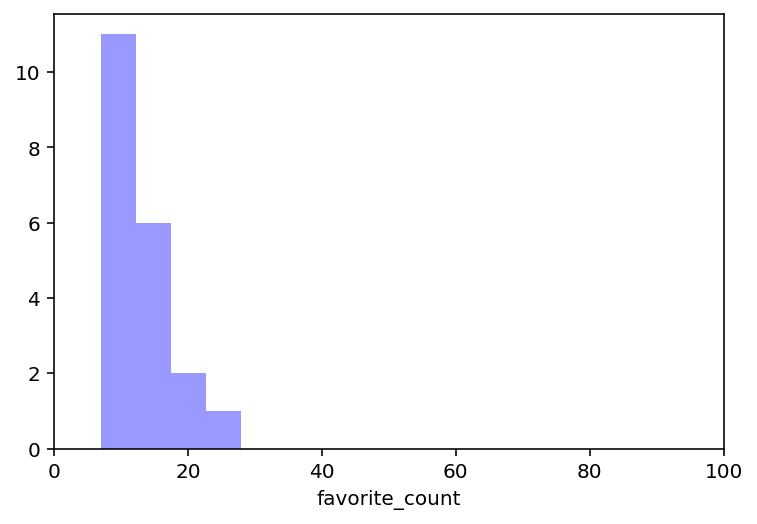

In [66]:
sns.distplot(df.favorite_count, kde = False, color = "blue");
plt.xlim(0, 100)

(0.0, 5.0)

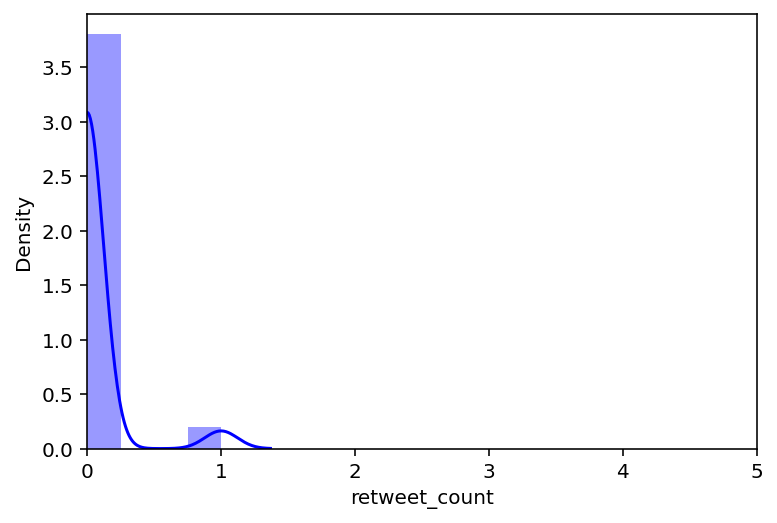

In [67]:
sns.distplot(df.retweet_count, color = "blue");
plt.xlim(0, 5)